# downloading data

In [1]:
# !pip install opendatasets --upgrade --quiet

In [2]:
import opendatasets as od

In [3]:
od.download("https://www.kaggle.com/competitions/playground-series-s4e1/data")

Skipping, found downloaded files in ".\playground-series-s4e1" (use force=True to force download)


In [4]:
import os

In [5]:
os.listdir()

['.ipynb_checkpoints',
 'Bank_churnch_comp.ipynb',
 'bank_logistic_model.csv',
 'bank_random_model.csv',
 'playground-series-s4e1',
 'xgb22_alpha172.csv',
 'xgb33_kfold.csv']

In [6]:
os.listdir("./playground-series-s4e1")

['sample_submission.csv', 'test.csv', 'train.csv']

# importing liberaries

In [7]:
# !pip install numpy pandas matplotlib seaborn plotly scikit-learn --upgrade --quiet

In [8]:
import os
import numpy as np
import pandas as pd

In [9]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import KFold

In [10]:
from lightgbm import LGBMClassifier

In [11]:
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Reading Data

In [12]:
train_raw_df=pd.read_csv("./playground-series-s4e1/train.csv")
test_raw_df=pd.read_csv("./playground-series-s4e1/test.csv")

In [13]:
train_raw_df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [14]:
test_raw_df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,15662091,P'eng,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62
110019,275053,15774133,Cox,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68
110020,275054,15728456,Ch'iu,712,France,Male,31.0,2,0.00,2,1.0,0.0,16287.38
110021,275055,15687541,Yegorova,709,France,Female,32.0,3,0.00,1,1.0,1.0,158816.58


# preprocessing and data cleaning

In [15]:
train_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [16]:
train_raw_df.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [17]:
train_raw_df.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [18]:
train_raw_df.duplicated().sum()

0

In [19]:
test_raw_df.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [20]:
test_raw_df.duplicated().sum()

0

In [21]:
train_raw_df.set_index("id",inplace=True)
test_raw_df.set_index("id",inplace=True)

In [22]:
train_raw_df.drop(columns=["CustomerId","Surname"],inplace=True)
test_raw_df.drop(columns=["CustomerId","Surname"],inplace=True)

In [23]:
train_raw_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...
165029,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0


# EDA

In [24]:
train_raw_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...
165029,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0


<Axes: xlabel='HasCrCard', ylabel='count'>

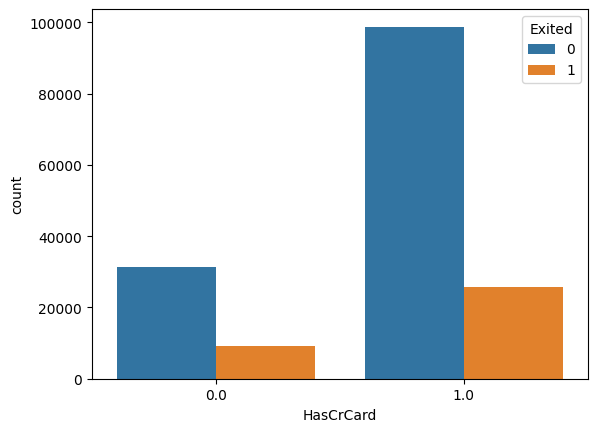

In [25]:
sns.countplot(data=train_raw_df,x='HasCrCard', hue='Exited')

<Axes: xlabel='IsActiveMember', ylabel='count'>

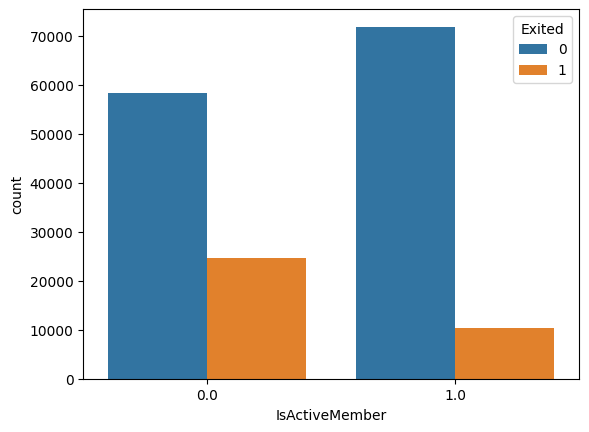

In [26]:
sns.countplot(data=train_raw_df,x='IsActiveMember', hue='Exited')

# Feature Engineering

## Scaling

In [27]:
numeric_cols=['CreditScore', 'Age', 'Tenure', 'Balance','NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
categorical_cols=['Geography', 'Gender']

In [28]:
raw_df=pd.concat([train_raw_df,test_raw_df],ignore_index=True)

In [29]:
scaler=MinMaxScaler()

In [30]:
scaler.fit(raw_df[numeric_cols])

MinMaxScaler()

In [31]:
train_raw_df[numeric_cols]=scaler.transform(train_raw_df[numeric_cols])
test_raw_df[numeric_cols]=scaler.transform(test_raw_df[numeric_cols])

## encoding

In [32]:
gender_dict={"Gender":{"Male":1,"Female":0}}

In [33]:
train_raw_df.replace(gender_dict,inplace=True)
test_raw_df.replace(gender_dict,inplace=True)

In [34]:
encoder=OneHotEncoder(sparse_output=False,handle_unknown='ignore')

In [35]:
encoder.fit(raw_df[['Geography']])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [36]:
encoder.categories_

[array(['France', 'Germany', 'Spain'], dtype=object)]

In [37]:
encoded_cols=list(encoder.get_feature_names_out(['Geography']))
encoded_cols

['Geography_France', 'Geography_Germany', 'Geography_Spain']

In [38]:
train_raw_df[encoded_cols]=encoder.transform(train_raw_df[['Geography']])
test_raw_df[encoded_cols]=encoder.transform(test_raw_df[['Geography']])

In [39]:
train_raw_df.drop(columns=["Geography"],inplace=True)
test_raw_df.drop(columns=["Geography"],inplace=True)

# Train,val,test Split

In [40]:
train_df,val_df=train_test_split(train_raw_df,test_size=0.3,random_state=42)

In [41]:
test_df=test_raw_df.copy()

In [42]:
input_cols=numeric_cols+encoded_cols+['Gender']
target='Exited'

In [43]:
x_train=train_df[input_cols]
y_train=train_df[target]
x_val=val_df[input_cols]
y_val=val_df[target]
x_test=test_df[input_cols]

# acc_score, roc_auc_score and create submission

In [44]:
def acc_score(x_t,y_t,x_v,y_v,model):
    return {"train":model.score(x_t,y_t),"val":model.score(x_v,y_v)}

In [45]:
def roc_score(x_t,y_t,x_v,y_v,model):
    return {"train":roc_auc_score(y_t,model.predict_proba(x_t)[:,1]),"val":roc_auc_score(y_v,model.predict_proba(x_v)[:,1])}

In [46]:
def create_submission(model,x_te,fname,sample_data_dir="./playground-series-s4e1/"):
    test_preds=model.predict_proba(x_te)[:, 1]
    submission_df=pd.read_csv(sample_data_dir+"sample_submission.csv")
    submission_df['Exited']=test_preds
    submission_df.to_csv(fname,index=False)

In [47]:
def train_and_evaluate(kx_train, ky_train,kx_val, ky_val,model_class,**args):
    model=model_class(n_jobs=-1,random_state=42,**args)
    model.fit(kx_train, ky_train)
    return model,{"args":args,"acc":acc_score(kx_train, ky_train,kx_val, ky_val,model),"roc":roc_score(kx_train, ky_train,kx_val, ky_val,model)}

# Logistic Model

## Train

In [48]:
logisctic_model=LogisticRegression(random_state=42,solver="liblinear")

In [49]:
logisctic_model.fit(x_train,y_train)

LogisticRegression(random_state=42, solver='liblinear')

## prediction and evalution

In [50]:
acc_score(x_train,y_train,x_val,y_val,logisctic_model)

{'train': 0.8335050163170971, 'val': 0.8352891276685989}

In [51]:
roc_score(x_train,y_train,x_val,y_val,logisctic_model)

{'train': 0.8179122537608947, 'val': 0.8175985602306559}

## submission

In [52]:
create_submission(logisctic_model,x_test,"bank_logistic_model.csv")

# Random forest

## train

In [53]:
random_model11=RandomForestClassifier(n_jobs=-1,random_state=42)

In [54]:
random_model11.fit(x_train,y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

## prediction and evalution

In [55]:
acc_score(x_train,y_train,x_val,y_val,random_model11)

{'train': 0.9997316551682349, 'val': 0.8587990547555089}

In [56]:
roc_score(x_train,y_train,x_val,y_val,random_model11)

{'train': 0.9999995125221878, 'val': 0.871868649341799}

## hyperparameter Tunning

In [57]:
def test_params_random(**args):
  random_model=RandomForestClassifier(n_jobs=-1,random_state=42,**args).fit(x_train,y_train)
  print(acc_score(x_train,y_train,x_val,y_val,random_model))

In [58]:
test_params_random(max_depth=9)

{'train': 0.8679656864866736, 'val': 0.8640908081032498}


## sumbmission improved22

In [59]:
random_model22=RandomForestClassifier(n_jobs=-1,random_state=42,max_depth=9).fit(x_train,y_train)

In [60]:
acc_score(x_train,y_train,x_val,y_val,random_model22)

{'train': 0.8679656864866736, 'val': 0.8640908081032498}

In [61]:
roc_score(x_train,y_train,x_val,y_val,random_model22)

{'train': 0.8963735334273679, 'val': 0.8869012168487956}

In [62]:
create_submission(random_model22,x_test,"bank_random_model.csv")

# Gradient boosting

## Train

In [63]:
xgb_model11=XGBClassifier(n_jobs=-1,random_state=42)

In [64]:
xgb_model11.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...)

## predict and evaluation

In [65]:
acc_score(x_train,y_train,x_val,y_val,xgb_model11)

{'train': 0.8833305921764497, 'val': 0.8647573266546827}

In [66]:
roc_score(x_train,y_train,x_val,y_val,xgb_model11)

{'train': 0.9172574122983079, 'val': 0.8869468865920908}

## hyperparameter tunning

In [67]:
def test_params_xgb(**args):
  xgb_model=XGBClassifier(n_jobs=-1,random_state=42,**args).fit(x_train,y_train)
  return {"args":args,"acc":acc_score(x_train,y_train,x_val,y_val,xgb_model11),"roc":roc_score(x_train,y_train,x_val,y_val,xgb_model11)}

## improve 22

In [68]:
xgb_model22=XGBClassifier(n_jobs=-1,random_state=42,reg_alpha=172).fit(x_train,y_train)

In [69]:
acc_score(x_train,y_train,x_val,y_val,xgb_model22)

{'train': 0.8660266786700483, 'val': 0.8655854254610087}

In [70]:
roc_score(x_train,y_train,x_val,y_val,xgb_model22)

{'train': 0.8899399492720332, 'val': 0.8886504092607341}

In [71]:
create_submission(xgb_model22,x_test,"xgb22_alpha172.csv")

## k-fold

In [72]:
kfold_x=train_raw_df[input_cols]
kfold_y=train_raw_df[target]
def test_para_kfold(n_kfold=5,**args):
    kfold = KFold(n_splits=n_kfold)
    models=[]
    for train_idxs, val_idxs in kfold.split(train_raw_df):
        # print((train_idxs, val_idxs))
        # print((len(train_idxs), len(val_idxs)))
        kx_train, ky_train = kfold_x.iloc[train_idxs], kfold_y.iloc[train_idxs]
        kx_val, ky_val = kfold_x.iloc[val_idxs], kfold_y.iloc[val_idxs]
        model,report=train_and_evaluate(kx_train, ky_train,kx_val, ky_val,XGBClassifier,**args)
        print(report,end="\n\n")
        models.append((model,report))
    return models

## improved 33

In [73]:
models33=test_para_kfold(reg_alpha=172)

{'args': {'reg_alpha': 172}, 'acc': {'train': 0.865451763654404, 'val': 0.8683309600993728}, 'roc': {'train': 0.8894770747367671, 'val': 0.8918404111179368}}

{'args': {'reg_alpha': 172}, 'acc': {'train': 0.8666181917335091, 'val': 0.8636046899142606}, 'roc': {'train': 0.8906421618714611, 'val': 0.8861039407616621}}

{'args': {'reg_alpha': 172}, 'acc': {'train': 0.8658153256530862, 'val': 0.8659981216105674}, 'roc': {'train': 0.8901313367061133, 'val': 0.8891696764906846}}

{'args': {'reg_alpha': 172}, 'acc': {'train': 0.8663606686511093, 'val': 0.8623019359529797}, 'roc': {'train': 0.8905244357200996, 'val': 0.8875294295872989}}

{'args': {'reg_alpha': 172}, 'acc': {'train': 0.8663313842518253, 'val': 0.8648124583409077}, 'roc': {'train': 0.8903052237246456, 'val': 0.8878669938028434}}



In [74]:
xgb_model33=models33[0][0]

In [75]:
acc_score(x_train, y_train,x_val, y_val,xgb_model33)

{'train': 0.8659054906815093, 'val': 0.8663125366080265}

In [76]:
roc_score(x_train, y_train,x_val, y_val,xgb_model33)

{'train': 0.8896305551433155, 'val': 0.8906907172001111}

In [77]:
create_submission(xgb_model33,x_test,"xgb33_kfold.csv")

## improving 

In [78]:
t44_roc=0
v44_roc=0
for _,report in models33:
    t44_roc+=report["roc"]["train"]
    v44_roc+=report["roc"]["val"]
t44_roc=t44_roc/5
v44_roc=v44_roc/5
t44_roc,v44_roc

(0.8902160465518174, 0.8885020903520852)

# lightGBM

## Train

In [ ]:
lgb_model11=LGBMClassifier(n_jobs=-1,random_state=42 ) # verbose= -1  

In [ ]:
lgb_model11.fit(x_train,y_train)

In [ ]:
acc_score(x_train,y_train,x_val,y_val,lgb_model11)

In [ ]:
roc_score(x_train,y_train,x_val,y_val,lgb_model11)

# improving

In [ ]:
lgb_args={"verbose":-1} 
for i in np.arange(100,200,1):
    model,report=train_and_evaluate(x_train,y_train,x_val,y_val,LGBMClassifier,reg_alpha=i,**lgb_args)
    print([i,report],end="\n\n")

# Gradient boosting on whole data

In [80]:
train_raw_df
input_cols=numeric_cols+encoded_cols+['Gender']
target='Exited'

In [81]:
xw_train=train_raw_df[input_cols]
yw_train=train_raw_df[target]

In [82]:
xgb_model44=XGBClassifier(n_jobs=-1,random_state=42,reg_alpha=172).fit(xw_train,yw_train)

In [83]:
create_submission(xgb_model44,x_test,"xgb44_alpha172.csv")

In [84]:
xgb_model44.predict(xw_train)

array([0, 0, 0, ..., 0, 0, 0])

# ensemmble

In [111]:
ran_csv=pd.read_csv("bank_random_model.csv")
xgb22_csv=pd.read_csv("xgb22_alpha172.csv")
xgb33_csv=pd.read_csv("xgb33_kfold.csv")
xgb33_csv=pd.read_csv("xgb44_alpha172.csv")

In [112]:
mo_sum=(ran_csv["Exited"]+2*xgb22_csv["Exited"]+3*xgb33_csv["Exited"]+5*xgb33_csv["Exited"])/11

In [113]:
mo_sum

0         0.022776
1         0.825498
2         0.031155
3         0.225102
4         0.367135
            ...   
110018    0.044493
110019    0.092418
110020    0.024635
110021    0.142846
110022    0.191796
Name: Exited, Length: 110023, dtype: float64

In [114]:
sum_sub=ran_csv.copy()

In [115]:
sum_sub["Exited"]=mo_sum

In [116]:
sum_sub.to_csv("ensemble4.csv",index=False)